# **Egyptian Apartment Price Prediction Project**

> This notebook documents the end-to-end machine learning process for Building A app is Predicting apartment prices in Egypt based on key real estate features.
And Also we will do Some Analysis on the Egyptian Real State

## Main Libraries

***Before Starting in any thing we will import our main Libraries***

In [45]:
# Import The Main Libraries for Explore The Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For Remove Warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## DataBase Connection

***Now We need to Swap Our Data from Database Server***

In [46]:
import pyodbc

# Connection info
server = 'PrimeDB.mssql.somee.com'
database = 'PrimeDB'
username = 'Redasaad123_SQLLogin_1'
password = 'tobz3nhm3p'
driver = '{ODBC Driver 17 for SQL Server}'  # Or '{SQL Server Native Client 11.0}'

# Connection string
conn_str = f"""
    DRIVER={driver};
    SERVER={server};
    DATABASE={database};
    UID={username};
    PWD={password};
    TrustServerCertificate=Yes;
    Packet Size=4096;
"""

try:
    # Establish connection
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()
    
    # Test query - list all tables
    cursor.execute("SELECT name FROM sys.tables")
    tables = cursor.fetchall()
    
    print("Available tables in the database:")
    for table in tables:
        print(table[0])
        
    # Retrieve all data from RealEstateProperties 
    query = "SELECT * FROM RealEstateProperties"
    data = pd.read_sql(query, conn)
    print("\nFetching data from RealEstateProperties table is done")
    
except Exception as e:
    print(f"Connection error: {str(e)}")
finally:
    # Close connection
    if 'conn' in locals():
        conn.close()

Available tables in the database:
__EFMigrationsHistory
Property
Roles
Transactions
UsersAccount
DetailsApartment
DetailsFloor
DetailsVilla
RoleClaim
FeedBack
RefreshToken
Rent
save
UserClaim
UserLogin
UserRole
UserToken
RealEstateProperties

Fetching data from RealEstateProperties table is done


**This table We swaped contains all the data we need, and now we will start the Exploration phase Now.**

## Quick Exploration

In [47]:
# Show sample of Data
data.sample(10)

,ID,Price,Description,Location,Area,Rooms,Bathrooms,Type
14694,14695,4704000.0,شقه للبيع في مدينه نور 123م بنظام سداد حتي 203...,القاهرة الكبرى / مدينة نور - مجموعة طلعت مصطفي,123.0,3.0,2.0,apartment
7784,7785,12000000.0,دوبلكس للبيع 350م + 120م حديقة القاهره الجديده...,القاهرة الكبرى / شارع عمرو بن العاص,350.0,4.0,3.0,duplex
44045,44046,12265000.0,امتلك دوبلكس فى المستقبل سيتى بموقع مميز واطول...,القاهرة الكبرى / كمبوند لا ميرادا - جراند بلازا,223.0,3.0,3.0,apartment
2986,2987,3100000.0,86 متر للبيع بكومباوند ذات كوميونيتى حدائق اكت...,القاهرة الكبرى / كمبوند ذات - فويا,86.0,1.0,1.0,studio
7187,7188,7953000.0,دوبلكس للبيع 4غرف ببرايم لوكيشن قسط ع 12سنه بك...,القاهرة الكبرى / أوريجامي جاردنز - كمبوند تا...,208.0,4.0,3.0,duplex
5623,5624,1045000.0,ستوديو 55 متر² للبيع فى Celia - سيليا-طريق الإ...,الساحل الشمالي / منتجع سيليا - داماك,55.0,1.0,NaN,studio
4753,4754,5750000.0,ستوديو للبيع في كمبوند فيلدج جيت Village Gate...,القاهرة الكبرى / فيلدج جيت مول - بالم هيلز,90.0,1.0,1.0,studio
23162,23163,9800000.0,إمتلك وحدتك 89 متر في فليدج ويست بمقدم %5 فقط,القاهرة الكبرى / كمبوند فيلدج ويست - درة,89.0,1.0,1.0,apartment
36785,36786,8694000.0,شقق 178 متر² للبيع فى The Icon Gardens - ذا اي...,القاهرة الكبرى / كمبوند ذا ايكون جاردنز - ست...,178.0,3.0,NaN,apartment
24570,24571,12000000.0,شقة 164 م متشطبة جاهزة على السكن فى كمبوند حي...,القاهرة الكبرى / كمبوند فينشي - مصر ايطاليا,164.0,3.0,2.0,apartment


---


# Data Description
After Exploring the dataset, I can summarize it as follows:

> This dataset contains property records where each entry represents one apartment with its details. Below is the column description:
```
ID : Unique identifier for each record (will be dropped as it's not useful for anything)
Price : Our target variable for the machine learning model
Description : Contains apartment details (we'll try to extract useful features from this)
Location : The geographical area of the apartment
Area : Apartment size in square meters
Rooms : Number of bedrooms
Bathrooms : Number of bathrooms
Type : Apartment classification (apartment, duplex, etc.)
```

In [48]:
# Some information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51404 entries, 0 to 51403
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           51404 non-null  int64  
 1   Price        51404 non-null  float64
 2   Description  51404 non-null  object 
 3   Location     51404 non-null  object 
 4   Area         51404 non-null  float64
 5   Rooms        48873 non-null  float64
 6   Bathrooms    44614 non-null  float64
 7   Type         51404 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.1+ MB


In [49]:
# Some statistics
data.describe()

,ID,Price,Area,Rooms,Bathrooms
count,51404.000000,5.140400e+04,51404.000000,48873.000000,44614.000000
mean,25702.500000,8.360984e+06,172.659482,2.682545,2.259044
std,14839.200956,9.319235e+06,85.125415,1.322873,1.251482
min,1.000000,3.500000e+04,5.000000,1.000000,0.000000
25%,12851.750000,4.270000e+06,121.000000,2.000000,2.000000
50%,25702.500000,7.000000e+06,159.000000,3.000000,2.000000
75%,38553.250000,1.075075e+07,207.000000,3.000000,3.000000
max,51404.000000,1.500000e+09,1345.000000,111.000000,158.000000


In [50]:
# Show Null Values
round((data.isna().sum() / len(data)) * 100 , 2)

ID              0.00
Price           0.00
Description     0.00
Location        0.00
Area            0.00
Rooms           4.92
Bathrooms      13.21
Type            0.00
dtype: float64

In [51]:
# Show Duplicated Rows
data.duplicated().sum()

np.int64(0)

> * We have a 5% Null values in Rooms col & 13% in Bathrooms col **we will handle all that in data Preprocessing**
> * There aren't any Duplicateds But I see when We Drop 'ID' , 'Describition' columns we will got a many Duplicateds **we will handle them Before Analysis**

---

## Some Cleaning & Feature Engineering

After Quick Exploration ,Data is relatively clean but needs feature engineering (extract features from Description/Location) before modeling
* Now we Will drop 'ID' Column
* Convert Some datatypes of columns
* We will check 'Describition' & 'Location' columns and do some Feature Extraction on them

In [52]:
# Drop unnecessary columns (ID)
data.drop('ID', axis=1, inplace=True)  # Remove ID column as it's not useful for modeling

In [53]:
# Convert some columns t Int instead of Float
data['Price'] = data['Price'].astype('int64')
data['Rooms'] = data['Rooms'].astype('Int64')
data['Bathrooms'] = data['Bathrooms'].astype('Int64')

### Describition Column

In [54]:
# Show Num of Uniques in the col
data["Description"].nunique()

35341

In [55]:
# Show Some samples of col
data['Description'].sample(25)

17012    شقة بحديقة 171 متر² للبيع فى ZAD Residence - ز...
36485    شقة للبيع 3غرف نوم بمقدم 780 الف وبالتقسيط ع12...
16853    شقق 189 متر² للبيع فى The View  - ذا ڤيو-شارع ...
9768     دوبلكس للبيع 245م بجاردن فى اميز لوكيشن فى كمب...
40273            شقه للبيع 149م  ف المقصد العاصمه الاداريه
22484    شقق 180 متر² للبيع فى Midtown Condo  - ميدتاون...
26918             شقة 3 غرف للبيع استلام فوري في مدينة نصر
23917    شقق 140 متر² للبيع فى Rosail City - روسيل سيتي...
37506        بنتهاوس جاهز للسكن في لا فيستا كاسكادا الساحل
11348    شقه دوبلكس للبيع العجمي الهانوفيل أمام مدرسة م...
35363    ستوديو بحديقة 84 متر² للبيع فى Hope - هوب-التج...
15298    شقق 133 متر² للبيع فى White Residence - وايت ر...
50188                شقه للبيع استلام فوري بكمبوند امورادا
9120     دوبلكس متشطب بإطلالة بانورامية على البحر بمقدم 0%
19337                    شقة 105 متر  للبيع فى شارع المايل
4219                ستوديو للبيع (ذا جيت 5 - العلمين) 51 م
23937    شقق 160 متر² للبيع فى Rosail City - روسيل سيتي.

We will Extract some Features and after that we will Run some statistical tests to Validate feature importance

In [56]:
import re # For Text Extraction

# Extracts whether apartment is Furnished from 'description' text
data['Furnished'] = data['Description'].str.contains(
    r'''مفروش[ةه]?|فرش|أثاث|أثاث كامل|مجهزة?|بفرشها|ديكور|ديكورات|كراسي
    |سرير|طقم حمام|ترابيزات|ستائر|اجهزة كهربائية|تكييف''',
    regex=True, 
    case=False
).astype(int)

# Extracts whether apartment is Finished from 'description' text
data['Finished'] = data['Description'].str.contains(
    r'(?<!نصف )تشطيب|متشطبة?|سوبر لوكس|لوكس|تشطيب فاخر|تشطيب كامل|مشطبة', 
    regex=True,
    case=False
).astype(int)

# Extracts whether apartment is have a view from 'description' text
data['View'] = data['Description'].str.contains(
    r'''واجهة|واجهه|مشرفة|مشرف|فيو|إطلالة|إطلاله|مطلة
    |تطل على|بحري|شارع رئيسي|نيلية|مدينة|رؤية مباشرة''',
    regex=True, 
    case=False
).astype(int)


# Extracts 'Feature' column from 'description' text
# Geographical features dictionary only
property_features = {
    'كمبوند': r'كمبوند|كومبوند|compound',
    'ساحلي': r'ساحل|بحري|شاطئ|نيل[ية]?',
    'مدينة': r'سيتي|مدينة|city',
    'قرية': r'قرية|village',
    'شارع رئيسي': r'شارع رئيسي',
    'شارع عادي': r'شارع|street',
    'العاصمة الإدارية': r'عاصمة|capital',
    'حديقة': r'جاردن|حديقة|garden'
}

def extract_single_feature(desc):
    for feature, pattern in property_features.items():
        if re.search(pattern, desc, re.IGNORECASE):
            return feature
    return None  

data['Feature'] = data['Description'].apply(extract_single_feature)

# Check The num of the Furnished apartments
print(f"عدد الشقق المفروشة: {data['Furnished'].sum()}")
# Check The num of the Finished apartments
print(f"عدد الشقق المتشطبة: {data['Finished'].sum()}")
# Check The num of the View apartments
print(f"عدد الشقق الي ليها واجهة: {data['View'].sum()}")
# Check The num of the apartments have Features
print(f"عدد الشقق الي ليها ميزة: {data['Feature'].value_counts().sum()}")

عدد الشقق المفروشة: 1495
عدد الشقق المتشطبة: 9453
عدد الشقق الي ليها واجهة: 7440
عدد الشقق الي ليها ميزة: 25216


#### Stats with new Features

In [57]:
from scipy import stats

def analyze_feature_impact(data, features, target='Price'):
    """
    Perform statistical analysis comparing target variable between feature groups
    Returns DataFrame with t-test results and effect sizes
    """
    results = []
    
    for feature in features:
        if feature == 'Feature':
            group1 = data[data['Feature'].notna()][target]
            group0 = data[data['Feature'].isna()][target]
        else:
            group1 = data[data[feature] == 1][target]
            group0 = data[data[feature] == 0][target]
        
        # Calculate t-test
        t_stat, p_val = stats.ttest_ind(group1, group0, equal_var=False)
        
        # Calculate effect size (Cohen's d)
        n1, n0 = len(group1), len(group0)
        pooled_std = np.sqrt(((n1-1)*group1.std()**2 + (n0-1)*group0.std()**2) / (n1 + n0 - 2))
        cohens_d = (group1.mean() - group0.mean()) / pooled_std
        
        # Store results
        results.append({
            'Feature': feature,
            'Mean (Yes)': group1.mean(),
            'Mean (No)': group0.mean(),
            'Difference': group1.mean() - group0.mean(),
            'T-statistic': t_stat,
            'P-value': p_val,
            'Effect Size': cohens_d
        })
    
    return pd.DataFrame(results).round(2)

# Example usage:
features_to_analyze = ['Furnished', 'Finished', 'View', 'Feature']
results = analyze_feature_impact(data, features_to_analyze)
results

,Feature,Mean (Yes),Mean (No),Difference,T-statistic,P-value,Effect Size
0,Furnished,10074541.94,8309655.48,1764886.46,11.73,0.00,0.19
1,Finished,9502066.08,8103859.38,1398206.70,18.17,0.00,0.15
2,View,8371619.31,8359184.51,12434.80,0.16,0.87,0.00
3,Feature,8803811.33,7934593.29,869218.04,10.50,0.00,0.09


* 'Furnished', 'Finished' and 'Feature' have real but limited price impact (despite statistical significance)
* 'View' shows no significant effect on price in current dataset (We will drop it)
* After Extracting Furnished and Finished features from Description, we'll drop it as it's no longer needed

In [58]:
# Drop View Column
data.drop(['View','Description'], axis=1, inplace=True)
data.sample()

,Price,Location,Area,Rooms,Bathrooms,Type,Furnished,Finished,Feature
1233,1400000,الاسكندرية / البيطاش,210.0,4,2,roof,0,0,None


### Location Column

In [59]:
# Show Num of Uniques in the col
data["Location"].nunique()

2748

In [60]:
# Show Some samples of col
data["Location"].sample(25)

33529       القاهرة الكبرى  /  ذا مديان ريزيدنس - إيجي جاب
3392     القاهرة الكبرى  /  أوريجامي جاردنز - كمبوند تا...
27215           القاهرة الكبرى  /  كمبوند فيلدج ويست - درة
38956           القاهرة الكبرى  /  كمبوند مينوركا - مارديف
18194                             الاسكندرية  /  شارع طيبة
29812           القاهرة الكبرى  /  كمبوند فيلدج ويست - درة
15178           المنيا  /  كمبوند بورتو المنيا - عامر جروب
41975        القاهرة الكبرى  /  كمبوند دي جويا 4 - تاج مصر
33633                              القليوبية  /  وسط البلد
43267                      القاهرة الكبرى  /  طريق الواحات
32158                   الغردقة  /  مكادي هايتس - اوراسكوم
33333      القاهرة الكبرى  /  كمبوند أشجار سيتي - اي جي اي
3344            القاهرة الكبرى  /  كمبوند فيلدج ويست - درة
23706            القاهرة الكبرى  /  كمبوند الياسمين جاردنز
19059             القاهرة الكبرى  /  كمبوند رافتس - ذا ارك
45444          القاهرة الكبرى  /  كمبوند بادية - بالم هيلز
50595    القاهرة الكبرى  /  كمبوند فالنسيا فالي - ان سي 

We will splitt the column to extract useful Features

In [61]:
def extract_location_parts(location):
    """
    Enhanced location parser with fallback to district:
    1. First splits city (before ' / ')
    2. Checks for compound presence
    3. Treats remainder as district if no compound found
    """
    # Extract city (always before ' / ')
    parts = location.split(' / ')
    city = parts[0]
    remainder = parts[1] if len(parts) > 1 else None
    
    # Initialize
    compound, district = None, None
    
    # Case 1: Contains compound
    if remainder and 'كمبوند' in remainder:
        compound_part = remainder.split('كمبوند ')[1]
        if ' - ' in compound_part:
            compound, district = compound_part.split(' - ', 1)
        else:
            compound = compound_part
            district = None  # Explicitly set to avoid confusion
    
    # Case 2: No compound - treat entire remainder as district
    elif remainder:
        district = remainder.split(' - ')[0] if ' - ' in remainder else remainder
    
    return pd.Series([city, compound, district])

# Apply the function
data[['City', 'Compound', 'District']] = data['Location'].apply(extract_location_parts)

# Cleanup: 
# 1. Remove compound/district markers if accidentally captured
# 2. Standardize missing values
data['District'] = data['District'].str.replace(r'^(كمبوند|منتجع)\s*', '', regex=True)
for col in ['Compound', 'District']:
    data[col] = data[col].str.strip().replace('', None)

# Verification
data[['Location', 'City', 'Compound', 'District']].sample(5)

,Location,City,Compound,District
50551,القاهرة الكبرى / كمبوند فيلدج ويست - درة,القاهرة الكبرى,فيلدج ويست,درة
18077,القاهرة الكبرى / شاليا - كمبوند تاج سيتي,القاهرة الكبرى,تاج سيتي,None
15803,القاهرة الكبرى / شارع الجابري,القاهرة الكبرى,None,شارع الجابري
42643,القاهرة الكبرى / كمبوند وان 33 - بدرالدين,القاهرة الكبرى,وان 33,بدرالدين
2875,الغردقة / منتجع أطلانطس - كاستيلو,الغردقة,None,منتجع أطلانطس


In [62]:
# Check The Unique values 
data.City.unique()

array(['الاسكندرية ', 'القاهرة الكبرى ', 'الساحل الشمالي ', 'الغردقة ',
       'دمياط ', 'الشرقية ', 'الاسماعيلية ', 'القليوبية ', 'الغربية ',
       'مرسى مطروح ', 'الدقهلية ', 'كفر الشيخ ', 'بور سعيد ', 'أسوان ',
       'البحيرة ', 'العين السخنة ', 'شرم الشيخ ', 'راس سدر ', 'أسيوط ',
       'جنوب سيناء', 'الساحل الشمالي', 'جنوب سيناء ', 'قنا ', 'المنيا ',
       'المنوفية ', '', 'الفيوم ', 'السويس ', 'سوهاج ', 'الأقصر ',
       'مرسى مطروح', 'خارج مصر '], dtype=object)

the 'City' Column need to clean

In [63]:
# Strip leading and trailing spaces
data['City'] = data['City'].str.strip()

# Handle empty values
data['City'] = data['City'].replace('', np.nan)  # Replace empty values with Nulls

# Standardize similar city names
city_mapping = {
    'الساحل الشمالي ': 'الساحل الشمالي',
    'جنوب سيناء ': 'جنوب سيناء',
    'مرسى مطروح ': 'مرسى مطروح',
    'الاسكندرية ': 'الإسكندرية',
    'القاهرة الكبرى': 'القاهرة'
}

data['City'] = data['City'].replace(city_mapping)

# Display unique values after cleaning
print("Unique values after cleaning:")
print(data['City'].unique())


Unique values after cleaning:
['الاسكندرية' 'القاهرة' 'الساحل الشمالي' 'الغردقة' 'دمياط' 'الشرقية'
 'الاسماعيلية' 'القليوبية' 'الغربية' 'مرسى مطروح' 'الدقهلية' 'كفر الشيخ'
 'بور سعيد' 'أسوان' 'البحيرة' 'العين السخنة' 'شرم الشيخ' 'راس سدر' 'أسيوط'
 'جنوب سيناء' 'قنا' 'المنيا' 'المنوفية' nan 'الفيوم' 'السويس' 'سوهاج'
 'الأقصر' 'خارج مصر']


Now we need to Check Null values in the 3 columns

In [64]:
# Check null values in location-related columns
null_counts = data[['City', 'Compound', 'District']].isna().sum()

# Display results with column names
print("Null Value Counts:")
print(null_counts.to_string())

# Calculate percentage of nulls
print("\nNull Percentages:")
print((null_counts / len(data) * 100).round(1).astype(str) + '%')

Null Value Counts:
City            3
Compound    25092
District     5263

Null Percentages:
City         0.0%
Compound    48.8%
District    10.2%
dtype: object


* The 'Compound' Column have 50% Null Values & We will drop it , also It wasn't The very Emportand Feature
* The District Column have 10% Null Values we will handle it in **Preprocessing** because It be Important feature for Our Application
* The City column Consider Doesn't have Nulls & this is the most powerful feature we extracted.
* After Extracting City and District features from Location, we'll drop it as it's no longer needed

In [65]:
# Drop Compound Column 
data.drop(['Compound','Location'], axis=1, inplace=True)
print("✅ Dropped columns ")

✅ Dropped columns 


## Outliers & Duplicateds

> We Need To look deeply in The Numeric Features And Remove The outliers & also check Duplicateds after drop some columns
* ***To make Clean Analysis***
* ***And For Best Performance in ML***

In [66]:
# Show Some Statistics on Numeric Features
data[['Price' , 'Area' , 'Rooms' , 'Bathrooms']].describe()

,Price,Area,Rooms,Bathrooms
count,5.140400e+04,51404.000000,48873.0,44614.0
mean,8.360984e+06,172.659482,2.682545,2.259044
std,9.319235e+06,85.125415,1.322873,1.251482
min,3.500000e+04,5.000000,1.0,0.0
25%,4.270000e+06,121.000000,2.0,2.0
50%,7.000000e+06,159.000000,3.0,2.0
75%,1.075075e+07,207.000000,3.0,3.0
max,1.500000e+09,1345.000000,111.0,158.0


111 Roms & 158 Bathrooms !!

In [67]:
# Show some quantile Distribition on Numeric Features
data[['Price' , 'Area' , 'Rooms' , 'Bathrooms']].quantile([0,0.05,0.1,0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,Price,Area,Rooms,Bathrooms
0.00,3.500000e+04,5.0,1,0
0.05,1.250000e+06,65.0,1,1
0.10,2.183600e+06,80.0,1,1
0.25,4.270000e+06,121.0,2,2
0.50,7.000000e+06,159.0,3,2
0.75,1.075075e+07,207.0,3,3
0.90,1.546981e+07,275.0,4,3
0.95,1.938254e+07,330.0,4,4
0.99,3.046928e+07,470.0,5,4
1.00,1.500000e+09,1345.0,111,158


We need to Remove The extreme Outliers only Because We want to preserve data as much as possible.

In [68]:
def remove_outliers(df, column):
    """
    Remove outliers from a DataFrame column using modified IQR method.
    Uses 5th and 99th percentiles as bounds for more conservative outlier detection.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    column (str): Column name to process
    
    Returns:
    pd.DataFrame: Filtered DataFrame without outliers
    """
    # Calculate modified quartiles (5th and 95th percentiles)
    Q1 = df[column].quantile(0.05)  
    Q3 = df[column].quantile(0.85)  
    IQR = Q3 - Q1  
    
    # Calculate bounds with asymmetric multipliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Additional protection against negative values for positive-only metrics
    if column in ['Price', 'Area', 'Rooms', 'Bathrooms']:
        lower_bound = max(0, lower_bound)  # Ensure no negative values
    
    # Filter the DataFrame
    filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Log removal statistics
    n_removed = len(df) - len(filtered)
    if n_removed > 0:
        removal_percentage = (n_removed / len(df)) * 100
        print(f"Removed {n_removed:,} outliers ({removal_percentage:.1f}%) from {column}")
        print(f"New range: {lower_bound:,.2f} to {upper_bound:,.2f}")
    
    return filtered

In [69]:
# Apply to each numeric column
for col in ['Price', 'Area', 'Rooms', 'Bathrooms']:
    data = remove_outliers(data, col)

Removed 429 outliers (0.8%) from Price
New range: 0.00 to 31,875,000.00
Removed 268 outliers (0.5%) from Area
New range: 0.00 to 510.00
Removed 2,549 outliers (5.0%) from Rooms
New range: 0.00 to 6.00
Removed 4,033 outliers (8.4%) from Bathrooms
New range: 0.00 to 6.00


Now Check Duplicateds and Handle them

In [70]:
# Check and display count
print(f"Number of duplicated rows: {data.duplicated().sum()}")  

# Drop all duplicates
data = data.drop_duplicates() 
print("Duplicateds Dropped ✅")

Number of duplicated rows: 12960
Duplicateds Dropped ✅


***The Data Is Cleaned Now For Analysis, Still There are some Nulls in cols But As I said I will handle them In Data Preprocessing***

---

# Egyptian Real State Analysis

In Analysis Phase I need to put 10 Questions and we will analyze the data to answer on them 
```
1. What is the distribution of property prices across the dataset?  
2. How does property price vary with area?  
3. What is the relationship between number of rooms and property price?  
4. What is the relationship between number of bathrooms and property price?  
5. Which property type is most common? 
6. What is the price difference between the types of apartments?
7. How does finishing status affect property prices?  
8. Are furnished properties priced higher than unfurnished ones?  
9. What are the top districts by average property price?  
10. How does property price per square meter vary across cities?
```

In [71]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot grid matching the 10 questions
fig = make_subplots(
    rows=5, cols=2,
    specs=[
        [{"type": "histogram"}, {"type": "xy"}],  # Q1, Q2
        [{"type": "xy"}, {"type": "xy"}],         # Q3, Q4
        [{"type": "domain"}, {"type": "xy"}],     # Q5, Q6
        [{"type": "xy"}, {"type": "xy"}],         # Q7, Q8
        [{"type": "xy"}, {"type": "xy"}]          # Q9, Q10
    ],
    subplot_titles=(
        "1. Property Price Distribution",
        "2. Price vs Area",
        "3. Price by Number of Rooms",
        "4. Price by Number of Bathrooms",
        "5. Property Type Distribution",
        "6. Price Difference by Property Type",
        "7. Price by Finishing Status",
        "8. Price by Furnishing Status",
        "9. Top Districts by Average Price",
        "10. Price per sqm by City"
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.1
)

# Set layout with professional styling
fig.update_layout(
    height=2200,
    width=1200,
    showlegend=True,
    template='plotly_white',
    title_text="Egyptian Real State Analysis",
    title_x=0.5,
    font=dict(family="Arial", size=12)
)

# Calculate price per square meter
data['Price_per_sqm'] = data['Price'] / data['Area']

# 1. Price Distribution (Histogram) - Q1
fig1 = px.histogram(data, x='Price', nbins=50, 
                   color_discrete_sequence=['#636EFA'])
fig.add_trace(fig1['data'][0], row=1, col=1)

# 2. Price vs Area (Scatter plot) - Q2
fig2 = px.scatter(data, x='Area', y='Price', 
                 trendline="ols",
                 color_discrete_sequence=['#00CC96'])
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig2['data'][1], row=1, col=2)

# 3. Price by Rooms (Bar chart) - Q3
rooms_avg = data.groupby('Rooms')['Price'].mean().reset_index()
fig3 = px.bar(rooms_avg, x='Rooms', y='Price',
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.add_trace(fig3['data'][0], row=2, col=1)

# 4. Price by Bathrooms (Bar chart) - Q4
bathrooms_avg = data.groupby('Bathrooms')['Price'].mean().reset_index()
fig4 = px.bar(bathrooms_avg, x='Bathrooms', y='Price',
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.add_trace(fig4['data'][0], row=2, col=2)

# 5. Property Type Distribution (Pie chart) - Q5
fig5 = px.pie(data, names='Type',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.add_trace(fig5['data'][0], row=3, col=1)

# 6. Price Difference by Property Type (Bar chart) - Q6
type_price = data.groupby('Type')['Price'].mean().sort_values().reset_index()
fig6 = px.bar(type_price, x='Type', y='Price',
             color='Price',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.add_trace(fig6['data'][0], row=3, col=2)

# 7. Price by Finishing Status (Box plot) - Q7
finished_data = data[data['Finished'] == 1]
unfinished_data = data[data['Finished'] == 0]

fig7_finished = go.Box(y=finished_data['Price'], name='Finished',
                      marker_color='#2CA02C')
fig7_unfinished = go.Box(y=unfinished_data['Price'], name='Unfinished',
                        marker_color='#FF7F0E')

fig.add_trace(fig7_finished, row=4, col=1)
fig.add_trace(fig7_unfinished, row=4, col=1)

# 8. Price by Furnishing Status (Box plot) - Q8
furnished_data = data[data['Furnished'] == 1]
unfurnished_data = data[data['Furnished'] == 0]

fig8_furnished = go.Box(y=furnished_data['Price'], name='Furnished',
                       marker_color='#1F77B4')
fig8_unfurnished = go.Box(y=unfurnished_data['Price'], name='Unfurnished',
                         marker_color='#885F0E')

fig.add_trace(fig8_furnished, row=4, col=2)
fig.add_trace(fig8_unfurnished, row=4, col=2)

# 9. Top Districts by Price (Bar chart) - Q9
district_avg = data.groupby('District')['Price'].mean().sort_values(ascending=False).head(10).reset_index()
fig9 = px.bar(district_avg, x='District', y='Price',
             color='Price',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.add_trace(fig9['data'][0], row=5, col=1)
fig.update_xaxes(tickangle=45, row=5, col=1)  # Rotate District labels for better readability

# 10. Price per sqm by City (Bar chart) - Q10 (CHANGED FROM BOX TO BAR)
city_avg = data.groupby('City')['Price_per_sqm'].mean().sort_values(ascending=False).head(10).reset_index()
fig10 = px.bar(city_avg, x='City', y='Price_per_sqm',
              color='Price_per_sqm',
              color_continuous_scale=px.colors.sequential.Viridis)
fig.add_trace(fig10['data'][0], row=5, col=2)
fig.update_xaxes(tickangle=45, row=5, col=2)  # Rotate city labels for better readability

# Update axis labels and remove gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Add axis titles
fig.update_xaxes(title_text="Price (EGP)", row=1, col=1)
fig.update_xaxes(title_text="Area (sqm)", row=1, col=2)
fig.update_yaxes(title_text="Price (EGP)", row=1, col=2)
fig.update_xaxes(title_text="Number of Rooms", row=2, col=1)
fig.update_yaxes(title_text="Average Price (EGP)", row=2, col=1)
fig.update_xaxes(title_text="Number of Bathrooms", row=2, col=2)
fig.update_yaxes(title_text="Average Price (EGP)", row=2, col=2)
fig.update_yaxes(title_text="Price (EGP)", row=3, col=2)
fig.update_yaxes(title_text="Price (EGP)", row=4, col=1)
fig.update_yaxes(title_text="Price (EGP)", row=4, col=2)
fig.update_xaxes(title_text="District", row=5, col=1)
fig.update_yaxes(title_text="Average Price (EGP)", row=5, col=1)
fig.update_xaxes(title_text="City", row=5, col=2)
fig.update_yaxes(title_text="Price per sqm (EGP)", row=5, col=2)

# Ensure no color scales are shown
fig.update_layout(coloraxis_showscale=False)  

fig.show()

### **Business Insights**
We can go deeply in Analysis and Build more than one Dashboard , But I see these is the importance insights we need :
1. **Price Distribution Range**  
The majority of property prices fall between 1 million EGP and 11 million EGP, forming the core market segment.

2. **Area-Price Relationship**  
We observe a moderate positive correlation between area and price - as property size increases, so does the price, though not at a perfect rate.

3. **Room Count Impact**  
Property prices show expected positive growth with increasing room numbers, confirming standard market behavior.

4. **Bathroom Count Effect**  
Similarly, prices rise with more bathrooms as expected. The 9-bathroom properties show slightly lower prices, likely due to limited data points for this category.

5. **Property Type Frequency**  
Apartments dominate the dataset as the most frequently listed property type.

6. **Apartment vs. Duplex Pricing**  
Interestingly, apartments show higher prices than duplexes, though this may reflect differing sample sizes between the two categories rather than true market value.

7. **Finishing Status Premium**  
Finished apartments command higher prices as expected, though the price difference isn't dramatic.

8. **Furnishing Impact**  
Similarly, furnished properties show the anticipated price premium over unfurnished ones.

9. **Top Premium Districts**  
Season Resort, Marassi, and Katameya Coast emerge as the districts with the highest property prices.

10. **Price per Square Meter**  
Areas outside Egypt, South Sinai, and Ain Sokhna show the highest price per square meter values.

----

# **ML Process**

## Correlition With Target

After Analyze The data : ***The all Features impact on Target (Price) But also we will check The Numeric Correlition***

In [72]:
# Numeric Corr
data.corr(numeric_only=True)['Price']

Price            1.000000
Area             0.246318
Rooms            0.226870
Bathrooms        0.467412
Furnished        0.099409
Finished         0.189514
Price_per_sqm    0.722874
Name: Price, dtype: float64

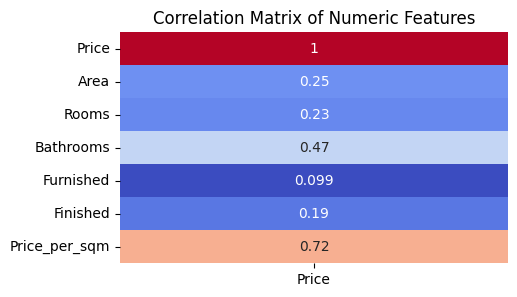

In [73]:
# Show Heatmap for corr
plt.figure(figsize=(5, 3))
sns.heatmap(data.corr(numeric_only=True)[['Price']], annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

* As I said All features show some level of correlation with our target (Price).
* We should remove the 'Price_per_sqm' column as it would cause data leakage in our model. (We Exctract it only for Analysis)

## Data Preprocessing


Steps We will included:
1. Remove Price_per_sqm to prevent data leakage
2. Fill Null Values in 'Feature' , 'District' column with the best Way
3. Build Preprocessing Pipeline for (Impution , Scaling,..)
4. Split The Data 

In [74]:
# Drop unnecessary Columns
data.drop('Price_per_sqm', axis=1, inplace=True)

# Fill Nulls in Feature
data['Feature'] = data['Feature'].fillna('ملهاش ميزة')

# Fill Nulls in City
data['City'] = data['City'].fillna('القاهرة') # Fill with the Most

# Define a function to safely get the mode
def get_mode_or_default(series, default="غير معروف"):
    modes = series.mode()
    return modes[0] if not modes.empty else default

# Fill missing districts with the most common district per city
data['District'] = data.groupby('City')['District'].transform(
    lambda x: x.fillna(get_mode_or_default(x)))

In [75]:
# Import preprocessing libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import BinaryEncoder

# Define feature types
numeric_features = ['Area', 'Rooms', 'Bathrooms']
high_cat_features = ['District', 'City']
low_cat_features = ['Type', 'Feature', 'Furnished', 'Finished']

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for high cardinality categorical features
high_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary_encoder', BinaryEncoder())
])

# Pipeline for low cardinality categorical features
low_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer for all preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('high_cat', high_cat_transformer, high_cat_features),
        ('low_cat', low_cat_transformer, low_cat_features)
    ])

print("Data preprocessor successfully built!")


Data preprocessor successfully built!


In [76]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 24932, Test samples: 6233


```Now The Data & Preprocessor is Ready for Modeling```

# Train ML Models

We will declare 2 Functions to use the in Modeling
1. Model Tunning
2. Model Evaluation

This is the structure we follow:
```
1. We will try 4-5 Classic Ml Models Then Try To Build A Neural Network
2. Tring Each Model on The data without any thing
3. apply The Model tunning Func on Each Model to Know the best Params and using it for Build Our Model
4. Apply The Model Evaluation func on Each Model To know The Best We got it
```

In [77]:
# Import Libraries For Modeling
from sklearn.model_selection import GridSearchCV ,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import ( r2_score,  mean_absolute_error, mean_squared_error)

In [78]:
# Model Tunning Function
def model_tuning(model, x, y, params):
    '''
    Parameters:
        1. model: the model we want to tune.
        2. x: feature matrix.
        3. y: target vector.
        4. params: hyperparameters we want to tune.

    Returns:
        best model: the model with the best hyperparameters after tuning.
    '''

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        scoring='r2')

    grid_search.fit(x, y)  # fit the model to the data
    print(f"Best parameters: {grid_search.best_params_}")  # print the best hyperparameters
    print(f"Best score (R^2): {grid_search.best_score_:.2f}")  # print the best R^2 score

    return grid_search.best_estimator_ , grid_search.best_params_

In [79]:
def model_evaluation(model, X, y, cv_folds=5, data_type='Train'):
    """
    Evaluates any sklearn model using multiple metrics and cross-validation
    
    Parameters:
        model: Any sklearn-compatible model (regressor or classifier)
        X: Feature matrix
        y: Target values
        cv_folds: Number of cross-validation folds (default: 5)
        data_type: String indicating data type ('Train' or 'Test')
    """
    
    # Get model name dynamically
    model_name = model.__class__.__name__
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=cv_folds)
    
    # Model predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Print results
    print(f"\n{'='*50}")
    print(f"Evaluation Results for {model_name} ({data_type} Data):")
    print(f"{'='*50}")
    print(f"R² Score: {r2:.4f}")  # Removed % as R² is not a percentage
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"\nCross-Validation R² (Mean ± Std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"{'='*50}")

> Strating with the First Regression Model

## Linear Regression

In [80]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Full Pipeline (Preprocessor With Model)
lr = make_pipeline(preprocessor,
                   LinearRegression())

# Fitting The Model on Data
lr.fit(X_train, y_train)

# See What We Got Without Tunning or anything
print("Train score: ", lr.score(X_train, y_train))

Train score:  0.36718048647497215


In [81]:
# Full Pipeline (Preprocessor With Model & Poly Features)
poly_lr = make_pipeline(preprocessor,
                          PolynomialFeatures(),
                          LinearRegression())

# Params For Model Tuning
params = {
    'polynomialfeatures__degree': [1, 2, 3]
}

# Model Tuning 
final_lr , best_lr_params= model_tuning(poly_lr, X_train, y_train, params)
final_lr

Best parameters: {'polynomialfeatures__degree': 2}
Best score (R^2): 0.45


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Area', 'Rooms',
                                                   'Bathrooms']),
                                                 ('high_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary_encoder',
                                                                   BinaryEncoder())]),
                                                  ['District', 'City']),
                                                 ('low_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Feature',
                                                   'Furnished',
                                                   'Finished'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [82]:
# Evaluation the lr Model
model_evaluation(final_lr,X_train, y_train,5)


Evaluation Results for Pipeline (Train Data):
R² Score: 0.5002
MAE: 2610723.3909
RMSE: 3599397.4372

Cross-Validation R² (Mean ± Std): 0.4509 ± 0.0196


## KNNRegressor

In [83]:
# Support Vector Regression
from sklearn.neighbors import KNeighborsRegressor

# Full Pipeline (Preprocessor With Model)
knn = make_pipeline(preprocessor,
                    KNeighborsRegressor())

# Fitting The Model on Data
knn.fit(X_train, y_train)

# See What We Got Without Tunning or anything
print("Train score: ", knn.score(X_train, y_train))

Train score:  0.7501840964459493


In [84]:
# Params For Model Tuning
# Parameters for  KNN Regressor
params = {
    'kneighborsregressor__n_neighbors': list(range(1, 10)), 
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__metric': ['minkowski', 'euclidean'],
    'kneighborsregressor__p': [1, 2] 
}

# Model Tuning 
best_knn , best_knn_params = model_tuning(knn, X_train, y_train, params)
best_knn

Best parameters: {'kneighborsregressor__metric': 'minkowski', 'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance'}
Best score (R^2): 0.61


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Area', 'Rooms',
                                                   'Bathrooms']),
                                                 ('high_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary_encoder',
                                                                   BinaryEncoder())]),
                                                  ['District', 'City']),
                                                 ('low_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Feature',
                                                   'Furnished',
                                                   'Finished'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=7, p=1, weights='distance'))])

In [85]:
# Evaluation the knn Model
model_evaluation(best_knn,X_train, y_train,5 )


Evaluation Results for Pipeline (Train Data):
R² Score: 0.9648
MAE: 322487.6537
RMSE: 954937.9718

Cross-Validation R² (Mean ± Std): 0.6115 ± 0.0078


## Random Forest Regressor

In [86]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Full Pipeline (Preprocessor With Model)
forst = make_pipeline(preprocessor,
                      RandomForestRegressor())

# Fitting The Model on Data
forst.fit(X_train, y_train)

# See What We Got Without Tunning or anything
print("Train score: ", forst.score(X_train, y_train))

Train score:  0.9255381819589233


In [87]:
# Parameters for forest Regressor
params = {
    'randomforestregressor__n_estimators': [50, 100, 150], 
    'randomforestregressor__max_depth': [None, 5, 10],   
    'randomforestregressor__min_samples_split': [2, 5],    
    'randomforestregressor__max_features': ['sqrt']        
}

# Tune the model
best_forst , best_forst_params = model_tuning(forst, X_train, y_train, params)
best_forst

Best parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 150}
Best score (R^2): 0.64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Area', 'Rooms',
                                                   'Bathrooms']),
                                                 ('high_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary_encoder',
                                                                   BinaryEncoder())]),
                                                  ['District', 'City']),
                                                 ('low_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Feature',
                                                   'Furnished',
                                                   'Finished'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=150))])

In [88]:
# Evaluation the Forest Model
model_evaluation(best_forst,X_train, y_train,5 )


Evaluation Results for Pipeline (Train Data):
R² Score: 0.9279
MAE: 872088.1379
RMSE: 1367419.1058

Cross-Validation R² (Mean ± Std): 0.6406 ± 0.0091


## XGB Regressor

* XGBoost is currently not compatible with the installed version of scikit-learn
* Therefore, we will use the Preprocessor separately and then build the model 


In [89]:
# Fit the Preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# XG Boost Regressor
from xgboost import XGBRegressor

# Intialize The Model 
best_xgb = XGBRegressor(
        n_estimators=350,
        max_depth=20, 
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )

# Fitting The Model on Data
best_xgb.fit(X_train_transformed, y_train)

# See What We Got Without Tunning or anything
print("Train score: ", best_xgb.score(X_train_transformed, y_train))

Train score:  0.9654204249382019


## Voting Regressor

In [90]:
# Voting Regressor
from sklearn.ensemble import  VotingRegressor 

# Create Voting Regressor
voting = VotingRegressor(
            estimators=[
                ('tree', best_knn),
                ('forest', best_forst)])

# Fitting The model
voting = voting.fit(X_train, y_train)

# Evaluation the Model
model_evaluation(voting, X_train, y_train, 5)


Evaluation Results for VotingRegressor (Train Data):
R² Score: 0.9559
MAE: 595477.3157
RMSE: 1069750.8444

Cross-Validation R² (Mean ± Std): 0.6421 ± 0.0084


### Log Transformation

As I saw above in Analysis The Price Distribition is very Skweed , so we will Log Transform it Maybe we will got Better Performance

In [91]:
# Log Transform for the target
def log_transform(x):
    return np.log1p(x)

# Log Transform
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

## Final Evaluation On Training

In [92]:
# Train the knn Model Again After log Transformation of Target

# Fitting The Model on Data
voting.fit(X_train, y_train_log)
best_forst.fit(X_train, y_train_log)
best_knn.fit(X_train, y_train_log)
best_xgb.fit(X_train_transformed, y_train_log)

# See What We Got Without Tunning or anything
print("Train score for Voting: ", voting.score(X_train, y_train_log))
print("Train score for Forest: ", best_forst.score(X_train, y_train_log))
print("Train score for KNN: ", best_knn.score(X_train, y_train_log))
print("Train score for XGB: ", best_xgb.score(X_train_transformed, y_train_log))

Train score for Voting:  0.9752364883246181
Train score for Forest:  0.9553604792574045
Train score for KNN:  0.9815702049907371
Train score for XGB:  0.9818198074764186


In [93]:
best_xgb.fit(X_train_transformed, y_train_log)
print("Train score for XGB: ", best_xgb.score(X_train_transformed, y_train_log))

Train score for XGB:  0.9818198074764186


## Evaluation On Testing

In [ ]:
# Evaluate Our Model On Test Data
y_pred = best_xgb.predict(X_test_transformed)
print(f"Accuracy (R²): {r2_score(y_test_log, y_pred):.2f} |(MAE): {mean_absolute_error(y_test_log, y_pred):.2f} | (RMSE): {np.sqrt(mean_squared_error(y_test_log, y_pred)):.2f}")

Accuracy (R²): 0.80 |(MAE): 0.26 | (RMSE): 0.38


Not Bad

### Save Preprocessor & Model

In [95]:
from joblib import dump
import os

# 2. Save preprocessor pipeline
dump(preprocessor, 'api/ml_model/preprocessor.joblib')

# 3. Save trained XGBoost model 
dump(best_xgb, 'api/ml_model/xgboost_model.joblib')

['api/ml_model/xgboost_model.joblib']

In [97]:
# Test
from joblib import load

preprocessor = load('api/ml_model/preprocessor.joblib')
model = load('api/ml_model/xgboost_model.joblib')

single_property = pd.DataFrame({
    'Area': [250.0],
    'Rooms': [3],
    'Bathrooms': [3],
    'Type': ['apartment'],
    'Furnished': [0],
    'Finished': [0],
    'Feature': ['كمبودد'],
    'City': ['القاهرة'],
    'District': ['التجمع الخامس']
})

processed = preprocessor.transform(single_property)
pred = np.expm1(model.predict(processed))[0]

print(f"السعر المتوقع: {pred:,} جنيه")


السعر المتوقع: 7,185,061.0 جنيه


## Conclusion
* **The Best Model We Got After Searching and Tunning : XGBOOST (97% On Training , 80% On Testing)**

    ```However This isn't Bad Performance Because The Data is Very Bad Quilty```